In [6]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from lib.utils import *

# Load and plot the data

Phase diagram data loaded from ../data/phase_diagram_JM_512.pkl


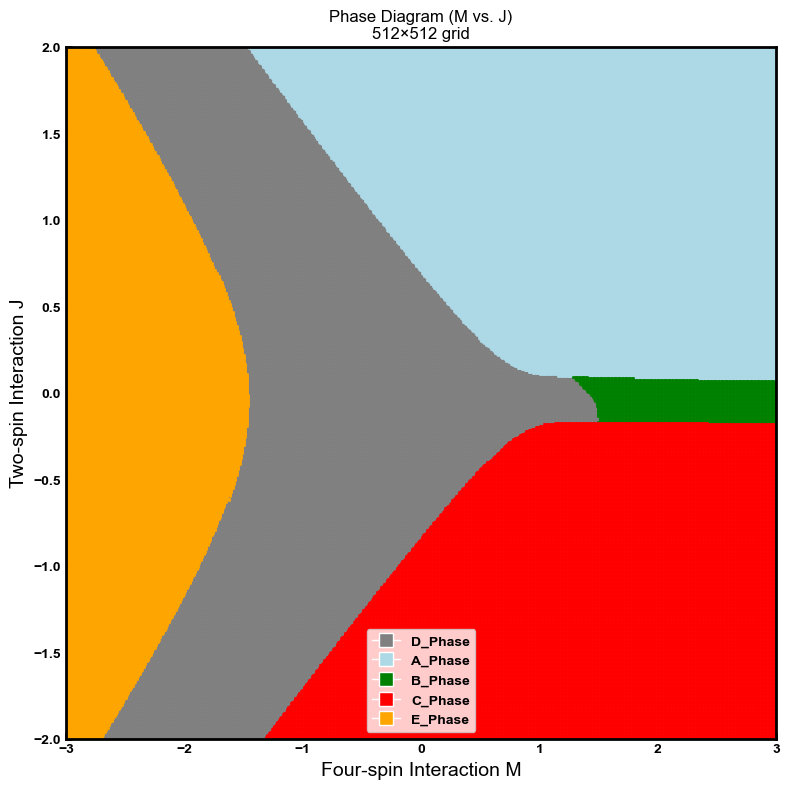

In [19]:
filename = "../data/phase_diagram_JM_512.pkl"

J_values, M_values, D_Phase, A_Phase, B_Phase, C_Phase, E_Phase, X_Phase, U_Phase = load_phase_diagram(filename)

fig = plot_phase_diagram(J_values, M_values, D_Phase, A_Phase, B_Phase, C_Phase, E_Phase, X_Phase, U_Phase)
plt.show()

# Replot the diagram

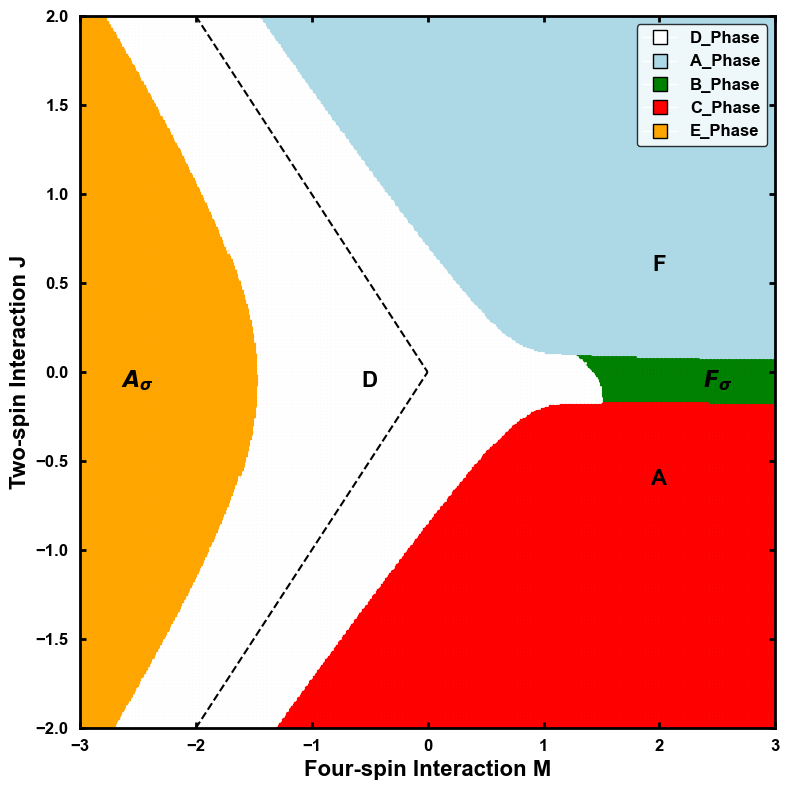

In [28]:
fig = plot_phase_diagram(J_values, M_values, D_Phase, A_Phase, B_Phase, C_Phase, E_Phase, X_Phase, U_Phase)
# Get the axes from the figure
ax = fig.axes[0]  # First (and only) axes in this case

ms = 1

# Prepare for plotting
cdic = {
    "D_Phase": "white",
    "A_Phase": "lightblue",
    "B_Phase": "green",
    "C_Phase": "red",
    "E_Phase": "orange",
    "X_Phase": "black",
    "U_Phase": "yellow"}

# First remove the existing plots for phases you want to change
for collection in list(ax.collections):  # Use list() to avoid problems when removing items
    if hasattr(collection, '_facecolors') and len(collection._facecolors) > 0:
        current_color = collection._facecolors[0]
        
# Then replot Phase with the new color
if D_Phase:
    ax.plot(np.array(D_Phase)[:,1], np.array(D_Phase)[:,0], ls="", marker="s", 
            mfc="white", mec="white", ms=ms, alpha=1, zorder=2)
            
# Change marker size for all Line2D objects
for line in ax.get_lines():
    # Only change the marker size for points, not for our dashed lines
    if line.get_linestyle() == 'None':  # This means it's a marker-only line
        line.set_markersize(ms)  # This changes the 'ms' parameter
        
# To handle the legend
# Check if legend exists before trying to remove it
legend = ax.get_legend()
if legend is not None:
    legend.remove()

# Add a legend with colored squares for each phase
handles = []
labels = []
# Add each phase to the legend if it exists
phases = ["D_Phase", "A_Phase", "B_Phase", "C_Phase", "E_Phase", "X_Phase", "U_Phase"]
for phase in phases:
    if locals()[phase]:
        handles.append(plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=cdic[phase], markersize=10, markeredgecolor='black', markeredgewidth=1.0))
        labels.append(phase)
ax.legend(handles, labels, loc='best', fontsize=12, frameon=True, facecolor='white', edgecolor='black')

    
# To change tick parameters and axes parameters
ax.tick_params(axis='x', labelsize=12, pad=8, colors='k', bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='y', labelsize=12, pad=8, colors='k', bottom=True, top=True, left=True, right=True)

# Important: Set ticks to be on top of other elements
ax.set_axisbelow(False)  # Opposite of "axis below" - ensures ticks are on top
ax.xaxis.set_zorder(3)   # Higher z-order for x-axis
ax.yaxis.set_zorder(3)   # Higher z-order for y-axis

# Force the spines (the box around the plot) to be on top
for spine in ax.spines.values():
    spine.set_zorder(4)
    
# Change axes properties
ax.set_xlabel("Four-spin Interaction M", fontsize=16, fontweight='bold')
ax.set_ylabel("Two-spin Interaction J", fontsize=16, fontweight='bold')

# Change the axis limits
#ax.set_xlim(-6, 6)
#ax.set_ylim(-1, 1)

# Change title (if needed)
ax.set_title("", fontsize=14, pad=15)

# Add text at the center of the region
text_props = {
    'fontsize': 16,
    'fontweight': 'bold',
    'ha': 'center',
    'va': 'center'}
    
ax.text(2, .6, "F", **text_props)
ax.text(2, -.6, "A", **text_props)
ax.text(-2.5, -0.05, r"$A_\sigma$", **text_props)
ax.text(-.5, -0.05, "D", **text_props)
ax.text(2.5, -0.05, r"$F_\sigma$", **text_props)

# Get the current axis limits to determine line extent
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# Define line limits covering the entire visible area
# For J=M line
line_min = max(x_min, y_min)
line_max = 0 #min(x_max, y_max)
# For J=-M line, we need to consider sign change
neg_line_min = max(x_min, -y_max)
neg_line_max = 0 #min(x_max, -y_min)

# Add dashed line for J=M
ax.plot([line_min, line_max], [line_min, line_max], 'k--', linewidth=1.5, zorder=3)
# Add dashed line for J=-M
ax.plot([neg_line_min, neg_line_max], [-neg_line_min, -neg_line_max], 'k--', linewidth=1.5, zorder=3)

# Optional: Add labels for the special lines
#ax.text(-.4, -.5, "J$=$M", fontsize=12, ha='right', va='bottom', rotation=45)
#ax.text(-.15, .5, "J$=-$M", fontsize=12, ha='right', va='top', rotation=-45)

fig.tight_layout()
plt.show()
#fig.savefig(f"phase_diagram_MJ_512.png", dpi=150, bbox_inches='tight')

# Take symetric and plot

## Vertical reflection

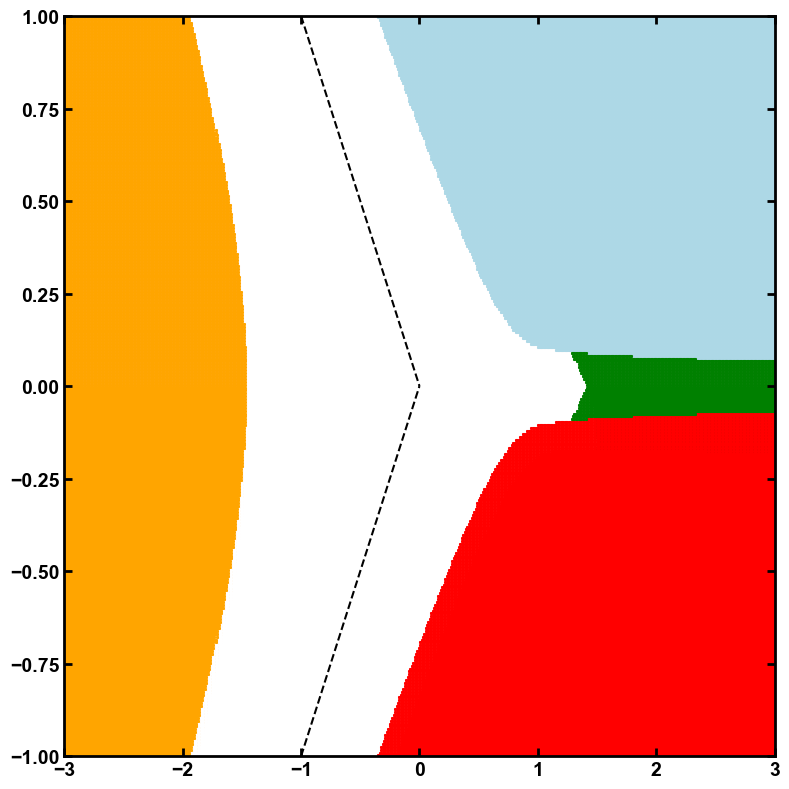

In [216]:
# Create new lists for reflected points
D_Phase_reflected = []
A_Phase_reflected = []
B_Phase_reflected = []
C_Phase_reflected = []
E_Phase_reflected = []
X_Phase_reflected = []
U_Phase_reflected = []

# Reflect across J=0 (i.e., reflect the J coordinate)
for phase_list, reflected_list in [
    (D_Phase, D_Phase_reflected),
    (A_Phase, A_Phase_reflected),
    (B_Phase, B_Phase_reflected),
    (C_Phase, C_Phase_reflected),
    (E_Phase, E_Phase_reflected),
    (X_Phase, X_Phase_reflected),
    (U_Phase, U_Phase_reflected)]:
    for point in phase_list:
        J, M = point
        # Only reflect points with J > 0
        if J > 0:
            reflected_list.append([-J, M])  # Reflect across J=0

# Prepare for plotting
cdic = {
    "D_Phase": "white",
    "A_Phase": "lightblue",
    "B_Phase": "green",
    "C_Phase": "red",
    "E_Phase": "orange",
    "X_Phase": "black",
    "U_Phase": "yellow"}

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)

# Set global font and line properties
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2

ms = 1.2
zorder_value = 1

# Plot original points
if D_Phase: ax.plot(np.array(D_Phase)[:,1], np.array(D_Phase)[:,0], ls="", marker="s", mfc=cdic["D_Phase"], mec=cdic["D_Phase"], ms=ms, alpha=1, zorder=zorder_value)
if A_Phase: ax.plot(np.array(A_Phase)[:,1], np.array(A_Phase)[:,0], ls="", marker="s", mfc=cdic["A_Phase"], mec=cdic["A_Phase"], ms=ms, alpha=1, zorder=zorder_value)
if B_Phase: ax.plot(np.array(B_Phase)[:,1], np.array(B_Phase)[:,0], ls="", marker="s", mfc=cdic["B_Phase"], mec=cdic["B_Phase"], ms=ms, alpha=1, zorder=zorder_value)
if C_Phase: ax.plot(np.array(C_Phase)[:,1], np.array(C_Phase)[:,0], ls="", marker="s", mfc=cdic["C_Phase"], mec=cdic["C_Phase"], ms=ms, alpha=1, zorder=zorder_value)
if E_Phase: ax.plot(np.array(E_Phase)[:,1], np.array(E_Phase)[:,0], ls="", marker="s", mfc=cdic["E_Phase"], mec=cdic["E_Phase"], ms=ms, alpha=1, zorder=zorder_value)
if X_Phase: ax.plot(np.array(X_Phase)[:,1], np.array(X_Phase)[:,0], ls="", marker="s", mfc=cdic["X_Phase"], mec=cdic["X_Phase"], ms=ms, alpha=1, zorder=zorder_value)
if U_Phase: ax.plot(np.array(U_Phase)[:,1], np.array(U_Phase)[:,0], ls="", marker="s", mfc=cdic["U_Phase"], mec=cdic["U_Phase"], ms=ms, alpha=1, zorder=zorder_value)

# Plot reflected points
if D_Phase_reflected: ax.plot(np.array(D_Phase_reflected)[:,1], np.array(D_Phase_reflected)[:,0], ls="", marker="s", mfc=cdic["D_Phase"], mec=cdic["D_Phase"], ms=ms, alpha=1, zorder=zorder_value)
if A_Phase_reflected: ax.plot(np.array(A_Phase_reflected)[:,1], np.array(A_Phase_reflected)[:,0], ls="", marker="s", mfc=cdic["C_Phase"], mec=cdic["C_Phase"], ms=ms, alpha=1, zorder=zorder_value)
if B_Phase_reflected: ax.plot(np.array(B_Phase_reflected)[:,1], np.array(B_Phase_reflected)[:,0], ls="", marker="s", mfc=cdic["B_Phase"], mec=cdic["B_Phase"], ms=ms, alpha=1, zorder=zorder_value)
if C_Phase_reflected: ax.plot(np.array(C_Phase_reflected)[:,1], np.array(C_Phase_reflected)[:,0], ls="", marker="s", mfc=cdic["C_Phase"], mec=cdic["C_Phase"], ms=ms, alpha=1, zorder=zorder_value)
if E_Phase_reflected: ax.plot(np.array(E_Phase_reflected)[:,1], np.array(E_Phase_reflected)[:,0], ls="", marker="s", mfc=cdic["E_Phase"], mec=cdic["E_Phase"], ms=ms, alpha=1, zorder=zorder_value)
if X_Phase_reflected: ax.plot(np.array(X_Phase_reflected)[:,1], np.array(X_Phase_reflected)[:,0], ls="", marker="s", mfc=cdic["X_Phase"], mec=cdic["X_Phase"], ms=ms, alpha=1, zorder=zorder_value)
if U_Phase_reflected: ax.plot(np.array(U_Phase_reflected)[:,1], np.array(U_Phase_reflected)[:,0], ls="", marker="s", mfc=cdic["U_Phase"], mec=cdic["U_Phase"], ms=ms, alpha=1, zorder=zorder_value)

ax.set_ylim(-1, 1) 
ax.set_xlim(min(M_values), max(M_values))

# Configure axis tickers to be inside and on top of the plotted points with higher zorder
ax.tick_params(which='both', labelsize=14, direction='in', bottom=True, top=True, left=True, right=True, width=2, length=6, zorder=5)
#ax.tick_params(axis='x', labelsize=12, pad=8, colors='k', bottom=True, top=True, left=True, right=True)
#ax.tick_params(axis='y', labelsize=12, pad=8, colors='k', bottom=True, top=True, left=True, right=True)

# Make sure axis spines have high zorder
for spine in ax.spines.values():
    spine.set_zorder(4)

# Add axis labels and title
ax.set_xlabel("Four-spin Interaction M", fontsize=16, fontweight='bold')
ax.set_ylabel("Two-spin Interaction J", fontsize=16, fontweight='bold')

# Add dashed line for J=M
ax.plot([line_min, line_max], [line_min, line_max], 'k--', linewidth=1.5, zorder=3)
# Add dashed line for J=-M
ax.plot([neg_line_min, neg_line_max], [-neg_line_min, -neg_line_max], 'k--', linewidth=1.5, zorder=3)

plt.tight_layout()
#plt.savefig("/Users/artun/Desktop/phase_diagram.png", dpi=200)
plt.show()